# BDD100K Dataset Exploration

## Imports

In [1]:
import os, sys

# if colab, mount drive and get the git repo
if 'google.colab' in sys.modules:
    from google.colab import drive
    print(os.getcwd())
    drive.mount('/content/drive')
    !git clone --recurse-submodules https://github.com/jsluijter02/LightSB_YOLO

    # Append LightSB_YOLO path
    sys.path.append(os.path.join(os.getcwd(), 'LightSB_YOLO'))

    ## TODO: 

# otherwise local path append
else:
    sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
from scripts.utils import dirs
from scripts.dataset import bdd
from scripts.utils import datacheck

dirs.add_YOLOPX_to_PATH()
from lib.config import cfg

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

/opt/anaconda3/envs/lightsb_yolo/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/lightsb_yolo/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Dataset Counts

### Total images Dataset, Day, Night, All

In [3]:
train = bdd.load_db(is_train=True)
val = bdd.load_db(is_train=False)

print("Train len: ", len(train))
print("Val len: ", len(val))

train_timeofdays = {'night': 0, 'daytime': 0, 'undefined': 0, 'dawn/dusk': 0}
for instance in train:
    tod = instance['timeofday']
    train_timeofdays[tod] += 1

val_timeofdays = {'night': 0, 'daytime': 0, 'undefined': 0, 'dawn/dusk': 0}
for instance in val:
    tod = instance['timeofday']
    val_timeofdays[tod] += 1

print('train: ', train_timeofdays)
print('val: ', val_timeofdays)

Train len:  70000
Val len:  10000
train:  {'night': 28028, 'daytime': 36800, 'undefined': 139, 'dawn/dusk': 5033}
val:  {'night': 3929, 'daytime': 5258, 'undefined': 35, 'dawn/dusk': 778}


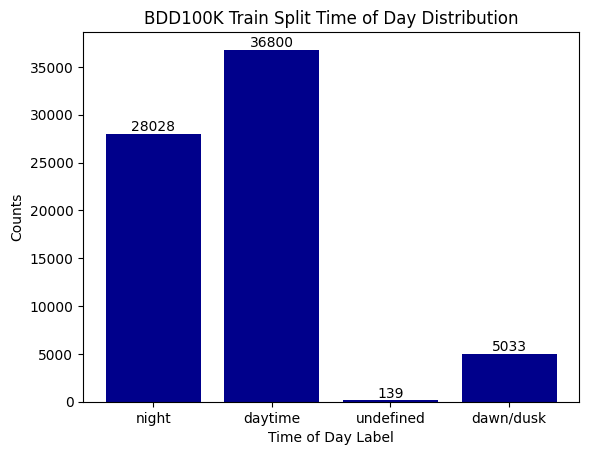

In [4]:
save_path = os.path.join(dirs.get_base_dir(), 'results', '6_compare', 'Data_Exploration')
os.makedirs(save_path, exist_ok=True)

bars = plt.bar(train_timeofdays.keys(), train_timeofdays.values(), color='darkblue')
plt.bar_label(bars, train_timeofdays.values())
plt.title('BDD100K Train Split Time of Day Distribution')
plt.xlabel('Time of Day Label')
plt.ylabel('Counts')
plt.savefig(os.path.join(save_path, 'Train_Timeofday_Distribution.png'))
plt.show()

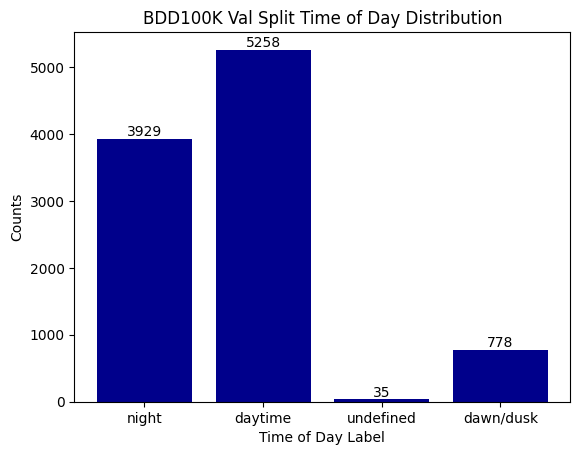

In [5]:
save_path = os.path.join(dirs.get_base_dir(), 'results', '6_compare', 'Data_Exploration')
os.makedirs(save_path, exist_ok=True)

bars = plt.bar(val_timeofdays.keys(), val_timeofdays.values(), color='darkblue')
plt.bar_label(bars, val_timeofdays.values())
plt.title('BDD100K Val Split Time of Day Distribution')
plt.xlabel('Time of Day Label')
plt.ylabel('Counts')
plt.savefig(os.path.join(save_path, 'Val_Timeofday_Distribution.png'))
plt.show()

### DBs counts

In [6]:
train_day = bdd.get_db(cfg, is_train=True, timeofday="daytime")
train_night= bdd.get_db(cfg, is_train=True, timeofday="night")

val_day = bdd.get_db(cfg, is_train=False, timeofday="daytime")
val_night = bdd.get_db(cfg, is_train=False, timeofday="night")

print("Number of train_day: ", len(train_day))
print("Number of train_night: ", len(train_night))
print("Number of val_day: ", len(val_day))
print("Number of val_night: ", len(val_night))

/opt/anaconda3/envs/lightsb_yolo/lib/python3.8/site-packages/albumentations/core/composition.py:192: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


Number of train_day:  36800
Number of train_night:  28028
Number of val_day:  5258
Number of val_night:  3929


## Label Counts

### DB entry

In [7]:
print(train_day[0])

{'image': '/Users/jochem/Documents/GitHub/LightSB_YOLO/data/images/train/385b0f61-1aee12ef.jpg', 'label': array([[0.        , 0.13281409, 0.5182259 , 0.01913748, 0.01360887],
       [0.        , 0.1259246 , 0.529113  , 0.02066848, 0.0108871 ],
       [0.        , 0.17108905, 0.55769163, 0.12324535, 0.06532259],
       [0.        , 0.23232897, 0.52829646, 0.01454448, 0.00816532],
       [0.        , 0.30122389, 0.52557468, 0.00688949, 0.00816532],
       [0.        , 0.34256084, 0.52353335, 0.00688949, 0.00408266],
       [0.        , 0.32418887, 0.52421379, 0.00995149, 0.0108871 ],
       [0.        , 0.42446925, 0.52625513, 0.00842049, 0.02041331],
       [0.        , 0.4642752 , 0.52013113, 0.00688949, 0.00816532],
       [0.        , 0.4589167 , 0.52285291, 0.00535849, 0.01360887],
       [0.        , 0.45317546, 0.52557468, 0.00918599, 0.02177419],
       [0.        , 0.44819972, 0.5289769 , 0.01301349, 0.02313508],
       [0.        , 0.47269569, 0.51604847, 0.00842049, 0.00544355

### Avg Number of Labels per Image

In [8]:
print(train_day[0]['label'])

[[0.         0.13281409 0.5182259  0.01913748 0.01360887]
 [0.         0.1259246  0.529113   0.02066848 0.0108871 ]
 [0.         0.17108905 0.55769163 0.12324535 0.06532259]
 [0.         0.23232897 0.52829646 0.01454448 0.00816532]
 [0.         0.30122389 0.52557468 0.00688949 0.00816532]
 [0.         0.34256084 0.52353335 0.00688949 0.00408266]
 [0.         0.32418887 0.52421379 0.00995149 0.0108871 ]
 [0.         0.42446925 0.52625513 0.00842049 0.02041331]
 [0.         0.4642752  0.52013113 0.00688949 0.00816532]
 [0.         0.4589167  0.52285291 0.00535849 0.01360887]
 [0.         0.45317546 0.52557468 0.00918599 0.02177419]
 [0.         0.44819972 0.5289769  0.01301349 0.02313508]
 [0.         0.47269569 0.51604847 0.00842049 0.00544355]
 [0.         0.48073343 0.51740936 0.00612399 0.00544355]
 [0.         0.49183317 0.51740936 0.01301348 0.00816532]
 [0.         0.5014019  0.51672891 0.00612399 0.00680444]
 [0.         0.51786014 0.52285291 0.00995149 0.01905242]
 [0.         0

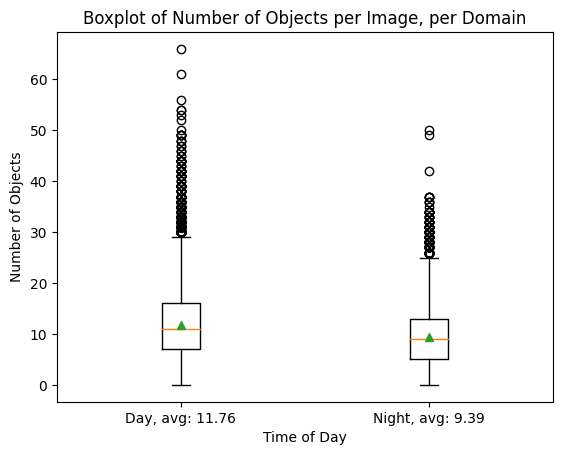

In [9]:
day_label_len = []
for instance in train_day:
    length = len(instance['label'])
    day_label_len.append(length)

for instance in val_day:
    length = len(instance['label'])
    day_label_len.append(length)

night_label_len = []
for instance in train_night:
    length = len(instance['label'])
    night_label_len.append(length)

for instance in val_night:
    length = len(instance['label'])
    night_label_len.append(length)

day_avg = round(np.average(day_label_len), ndigits=2)
night_avg = round(np.average(night_label_len), ndigits=2)

plt.boxplot([day_label_len, night_label_len], labels=[f'Day, avg: {day_avg}', f'Night, avg: {night_avg}'], showmeans=True)
plt.title('Boxplot of Number of Objects per Image, per Domain')
plt.ylabel('Number of Objects')
plt.xlabel('Time of Day')

plt.savefig(os.path.join(save_path, 'numberofobjects.png'))
plt.show()

## Image metrics

### Brightness

### Object Sizes
YOLOPX does not differentiate between object labels, so no class distribution necessary.

38
41


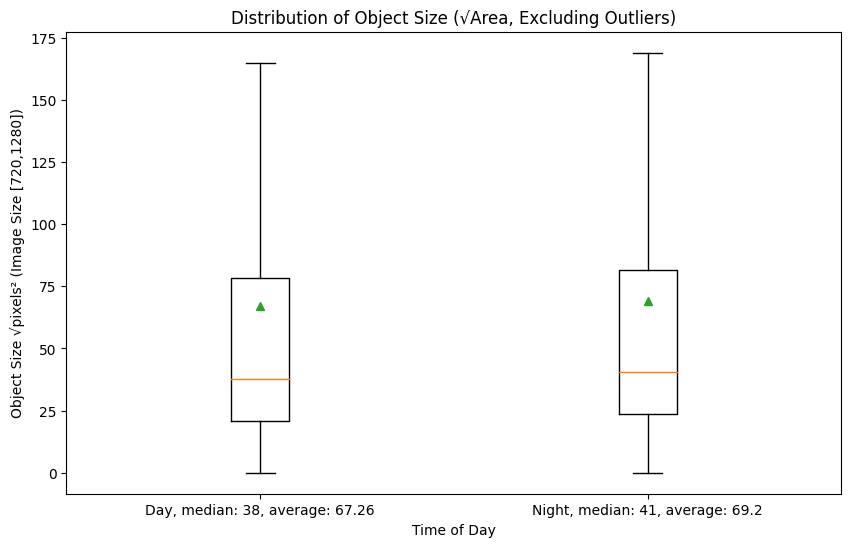

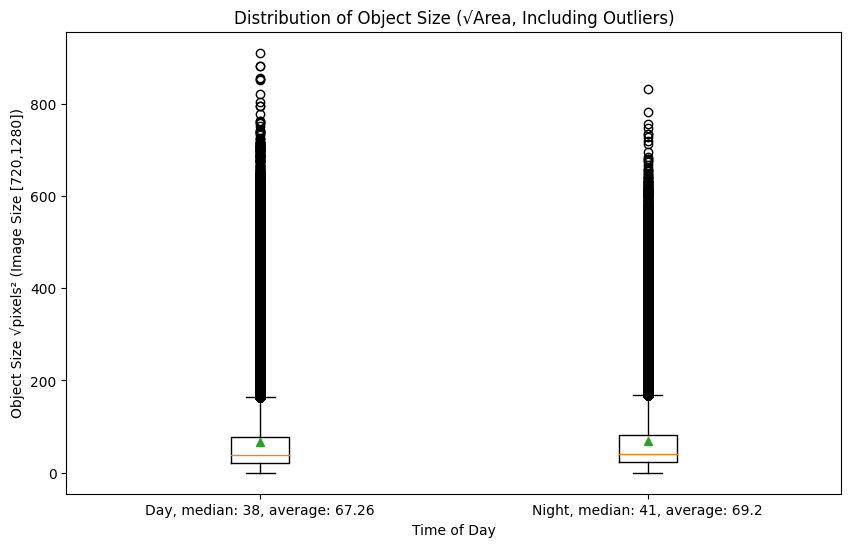

In [49]:
img_size = [720,1280]
day_labels_area = []
day_small_objects = []
for instance in train_day:
    labels = instance['label']
    for label in labels:
        width = label[3] * img_size[1]
        height = label[4] * img_size[0]
        day_labels_area.append(np.sqrt(width*height))

        if width <= 32 and height <= 32:
            day_small_objects.append(instance['image'])

for instance in val_day:
    labels = instance['label']
    for label in labels:
        width = label[3] * img_size[1]
        height = label[4] * img_size[0]
        day_labels_area.append(np.sqrt(width*height))
        if width <= 32 and height <= 32:
            day_small_objects.append(instance['image'])

night_labels_area = []
night_small_objects = []
for instance in train_night:
    labels = instance['label']
    for label in labels:
        width = label[3] * img_size[1]
        height = label[4] * img_size[0]
        night_labels_area.append(np.sqrt(width*height))
        if width <= 32 and height <= 32:
            night_small_objects.append(instance['image'])


for instance in val_night:
    labels = instance['label']
    for label in labels:
        width = label[3] * img_size[1]
        height = label[4] * img_size[0]
        night_labels_area.append(np.sqrt(width*height))
        if width <= 32 and height <= 32:
            night_small_objects.append(instance['image'])

day_avg = round(np.average(day_labels_area), ndigits=2)
night_avg = round(np.average(night_labels_area), ndigits=2)

day_median = round(np.median(day_labels_area))
print(day_median)
night_median = round(np.median(night_labels_area))
print(night_median)

plt.figure(figsize=(10,6))
plt.boxplot([day_labels_area, night_labels_area], labels=([f"Day, median: {day_median}, average: {day_avg}", f"Night, median: {night_median}, average: {night_avg}"]), showmeans=True, showfliers=False)
# plt.yscale('log')
plt.title('Distribution of Object Size (\u221AArea, Excluding Outliers)')
plt.ylabel('Object Size \u221Apixels\u00b2 (Image Size [720,1280])')
plt.xlabel('Time of Day')
plt.savefig(os.path.join(save_path, 'areaofobjectsnooutliers.png'))
plt.show()

plt.figure(figsize=(10,6))
plt.boxplot([day_labels_area, night_labels_area], labels=([f"Day, median: {day_median}, average: {day_avg}", f"Night, median: {night_median}, average: {night_avg}"]), showmeans=True, showfliers=True)
# plt.yscale('log')
plt.title('Distribution of Object Size (\u221AArea, Including Outliers)')
plt.ylabel('Object Size \u221Apixels\u00b2 (Image Size [720,1280])')
plt.xlabel('Time of Day')
plt.savefig(os.path.join(save_path, 'areaofobjectsWITHoutliers.png'))
plt.show()


In [55]:
print(len(day_small_objects)/sum(day_label_len)*100)
print(len(night_small_objects)/sum(night_label_len)*100)

35.80984257299871
31.749268611261055
